# 180280116118 ISHIKA TAILOR

Practical: 3 Titanic dataset

In this practical, we will perform Entropy of each column,Information gain, dataset attribute ranking

In [9]:
import pandas as pd
import seaborn as sns
import math
import numpy as np

In [83]:
address = 'titanic1.csv'
data = pd.read_csv(address)
data.columns=['index','passenger','Pclass','name','sex','age','sibsp','parch','ticket','fare','cabin','emb']
data.head()

,index,passenger,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,emb
0,1,Perished,3,"Braund, Mr. Owen Harris",male,19 - 40,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,19 - 40,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,19 - 40,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,19 - 40,1,0,113803,53.1000,C123,S
4,5,Perished,3,"Allen, Mr. William Henry",male,19 - 40,0,0,373450,8.0500,NaN,S


In [86]:
len(data)

1046

In [87]:
data.isna().sum()

index          0
passenger      0
Pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
cabin        774
emb            2
dtype: int64

In [88]:
#Replace NA Values with Median in Age Column
#Replace NA Values in Cabin with 'XXX'
#Replace NA Values in Embarked with Most Frequent Values 
data['fare']=data['fare'].fillna(data['fare'].median())
data['cabin']=data['cabin'].fillna('XXX')
data['emb']=data['emb'].fillna(data['emb'].mode()[0])
data.isna().sum()

index        0
passenger    0
Pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
emb          0
dtype: int64

In [89]:
len(data)

1046

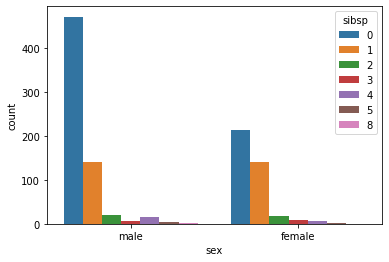

In [90]:
sns.countplot(x="sex",hue="sibsp", data=data)
#sns.countplot(x="Sex", data=data)
#sns.countplot(x="Age",hue="Sex",data=data)

In [91]:
#Add Dummy Column with survived=1, nonservived=0 
df=(pd.get_dummies(data['passenger'],drop_first=True))
#Add Dummy Column with Male=1, Female=0 
df1=(pd.get_dummies(data['sex'],drop_first=True)).rename(columns={'male':'gender'})
df1.head()

,gender
0,1
1,0
2,0
3,0
4,1


In [92]:
titanic=pd.concat([data,df,df1],axis=1)
titanic

,index,passenger,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,emb,Survived,gender
0,1,Perished,3,"Braund, Mr. Owen Harris",male,19 - 40,1,0,A/5 21171,7.2500,XXX,S,0,1
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,19 - 40,1,0,PC 17599,71.2833,C85,C,1,0
2,3,Survived,3,"Heikkinen, Miss. Laina",female,19 - 40,0,0,STON/O2. 3101282,7.9250,XXX,S,1,0
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,19 - 40,1,0,113803,53.1000,C123,S,1,0
4,5,Perished,3,"Allen, Mr. William Henry",male,19 - 40,0,0,373450,8.0500,XXX,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1301,Survived,3,"Peacock, Miss. Treasteall",female,Under 18,1,1,SOTON/O.Q. 3101315,13.7750,XXX,S,1,0
1042,1303,Survived,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,19 - 40,1,0,19928,90.0000,C78,Q,1,0
1043,1304,Survived,3,"Henriksson, Miss. Jenny Lovisa",female,19 - 40,0,0,347086,7.7750,XXX,S,1,0
1044,1306,Survived,1,"Oliva y Ocana, Dona. Fermina",female,19 - 40,0,0,PC 17758,108.9000,C105,C,1,0


In [93]:
AGE=(pd.get_dummies(titanic['age'],drop_first=True)).rename(columns={'Over 40': 'Over40','Under 18': 'Under18'})
AGE

,Over40,Under18
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1041,0,1
1042,0,0
1043,0,0
1044,0,0


In [94]:
#Add Dummy Column with emb_q,emb_s,(c )
EMB=(pd.get_dummies(titanic['emb'],drop_first=True)).rename(columns={'Q': 'EMB_Q','S': 'EMB_S'})

NewTitanic=pd.concat([titanic,EMB,AGE],axis=1)
NewTitanic


,index,passenger,Pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,emb,Survived,gender,EMB_Q,EMB_S,Over40,Under18
0,1,Perished,3,"Braund, Mr. Owen Harris",male,19 - 40,1,0,A/5 21171,7.2500,XXX,S,0,1,0,1,0,0
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,19 - 40,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,0
2,3,Survived,3,"Heikkinen, Miss. Laina",female,19 - 40,0,0,STON/O2. 3101282,7.9250,XXX,S,1,0,0,1,0,0
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,19 - 40,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
4,5,Perished,3,"Allen, Mr. William Henry",male,19 - 40,0,0,373450,8.0500,XXX,S,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1301,Survived,3,"Peacock, Miss. Treasteall",female,Under 18,1,1,SOTON/O.Q. 3101315,13.7750,XXX,S,1,0,0,1,0,1
1042,1303,Survived,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,19 - 40,1,0,19928,90.0000,C78,Q,1,0,1,0,0,0
1043,1304,Survived,3,"Henriksson, Miss. Jenny Lovisa",female,19 - 40,0,0,347086,7.7750,XXX,S,1,0,0,1,0,0
1044,1306,Survived,1,"Oliva y Ocana, Dona. Fermina",female,19 - 40,0,0,PC 17758,108.9000,C105,C,1,0,0,0,0,0


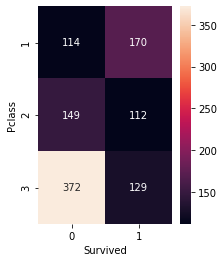

In [96]:
# Group the dataset by Pclass and Survived and then unstack them 
import matplotlib.pyplot as plt

group = NewTitanic.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
plt.figure(figsize = (3,4))

# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

In [97]:
for  i in NewTitanic.columns:
  print(i+ ":"+ str(NewTitanic[i].nunique()))
    #print(NewTitanic[i].nunique())
  #print(i +" "+ str(len(list(NewTitanic[i].nunique()))))

index:1046
passenger:2
Pclass:3
name:1044
sex:2
age:3
sibsp:7
parch:7
ticket:732
fare:256
cabin:175
emb:3
Survived:2
gender:2
EMB_Q:2
EMB_S:2
Over40:2
Under18:2


In [98]:
len(NewTitanic.age)

1046

In [99]:
NewTitanic.sibsp.value_counts(sort=False)

0    685
1    280
2     36
3     16
4     22
5      6
8      1
Name: sibsp, dtype: int64

In [100]:
Survived=len(NewTitanic[NewTitanic['Survived']==1])
SurvivedProb=Survived/len(NewTitanic)
SurvivedProb

0.39292543021032506

In [101]:
NSurvived=len(NewTitanic[NewTitanic['Survived']==0])
NSurvivedProb=NSurvived/len(NewTitanic)
NSurvivedProb

0.607074569789675

In [102]:
# calculate the column wise entropy for the split in the dataset
def colentropy(list):
    if(sum(list)<=1.01):
        if "NaN" in list:
            return 0
        else:
            return sum([-i*np.log2(i) for i in list])
    else:
        print("Sum of Probabilties in Column is not 1 %5.4f " % sum(list))
        return 0

In [103]:
entropy = -(SurvivedProb * math.log2(SurvivedProb) + NSurvivedProb * math.log2(NSurvivedProb))
# print the result
print('entropy: %.7f bits' % entropy)

entropy: 0.9666615 bits


In [104]:
NewTitanic.Survived.value_counts()

0    635
1    411
Name: Survived, dtype: int64

In [105]:
colentropy(NewTitanic.Survived.value_counts()/len(NewTitanic))

0.9666615050356869

In [106]:
colentropy(NewTitanic.gender.value_counts()/len(NewTitanic))

0.9513887558584189

In [64]:
colentropy(NewTitanic.age.value_counts()/len(NewTitanic))

1.3714677930465624

In [107]:
colentropy(NewTitanic.Pclass.value_counts()/len(NewTitanic))

1.5190861511275637

In [65]:
colentropy(NewTitanic.sibsp.value_counts()/len(NewTitanic))

1.3379266608772802

In [66]:
colentropy(NewTitanic.parch.value_counts()/len(NewTitanic))

1.2103319001984318

In [67]:
colentropy(NewTitanic.EMB_Q.value_counts()/len(NewTitanic))

0.27698192226171686

In [140]:
colentropy(NewTitanic.EMB_S.value_counts()/len(NewTitanic))

0.8120348760278828

In [141]:
colentropy(NewTitanic.emb.value_counts()/len(NewTitanic))

0.9881772092465039

In [108]:
group = NewTitanic.groupby(['gender', 'Survived']) 
Gender_survived = group.size().unstack() 
Gender_survived

Survived,0,1
gender,,
0,70,318
1,565,93


In [109]:
NewTitanic.gender.value_counts(sort=False)

0    388
1    658
Name: gender, dtype: int64

In [110]:
NewTitanic.gender.value_counts(sort=False)/len(NewTitanic)

0    0.370937
1    0.629063
Name: gender, dtype: float64

In [111]:
group = NewTitanic.groupby(['sex', 'Survived']) 
Gender_survived = group.size().unstack() 
#Gender Column Entropy
FemaleEntropy=colentropy(Gender_survived.iloc[0]/NewTitanic.gender.value_counts()[0])
MaleEntropy=colentropy(Gender_survived.iloc[1]/NewTitanic.gender.value_counts()[1])
print(str(MaleEntropy)+" " +str(FemaleEntropy))


0.5877306174905793 0.6809783293866828


In [112]:
HS=colentropy(NewTitanic.Survived.value_counts()/len(NewTitanic))
print(HS)

0.9666615050356869


In [113]:
Val=NewTitanic.gender.value_counts()/sum(Gender_survived.sum(axis=1))
HS-Val[0]*FemaleEntropy-Val[1]*MaleEntropy

0.34434187013049183

In [114]:
Classgroup = NewTitanic.groupby(['Pclass', 'Survived']) 
Class_survived = Classgroup.size().unstack() 
print(Class_survived)

Survived    0    1
Pclass            
1         114  170
2         149  112
3         372  129


In [115]:
Class_survived.iloc[2]/NewTitanic.Pclass.value_counts(sort=False).iloc[2]

Survived
0    0.742515
1    0.257485
Name: 3, dtype: float64

In [116]:
NewTitanic.Pclass.value_counts(sort=False).iloc[2]

501

In [117]:
Class_survived.div(NewTitanic.Pclass.value_counts(sort=False),axis=0)

Survived,0,1
Pclass,,
1,0.401408,0.598592
2,0.570881,0.429119
3,0.742515,0.257485


In [118]:
ClassProb=Class_survived.div(NewTitanic.Pclass.value_counts(sort=False),axis=0)
C1Entropy=colentropy(ClassProb.iloc[0])
C2Entropy=colentropy(ClassProb.iloc[1])
C3Entropy=colentropy(ClassProb.iloc[2])
print("C1:"+str(C1Entropy)+"C2:"+str(C2Entropy)+"C3:"+str(C3Entropy))

C1:0.9717685252857038C2:0.9854544225495253C3:0.8229274844491257


In [119]:
NewTitanic.Pclass.value_counts(sort=False)

1    284
2    261
3    501
Name: Pclass, dtype: int64

In [120]:
Weight=NewTitanic.Pclass.value_counts(sort=False)/len(NewTitanic)

In [121]:
HS-(Weight[1]*C1Entropy+Weight[2]*C2Entropy+Weight[3]*C3Entropy)

0.06276806796534473

In [122]:
SIBgroup = NewTitanic.groupby(['sibsp', 'Survived'])
SIB_survived = SIBgroup.size().unstack()
print(SIB_survived)

Survived      0      1
sibsp                 
0         442.0  243.0
1         137.0  143.0
2          20.0   16.0
3          11.0    5.0
4          18.0    4.0
5           6.0    NaN
8           1.0    NaN


In [124]:
SIB_survived.div(NewTitanic.sibsp.value_counts(sort=False),axis=0)


Survived,0,1
sibsp,,
0,0.645255,0.354745
1,0.489286,0.510714
2,0.555556,0.444444
3,0.687500,0.312500
4,0.818182,0.181818
5,1.000000,NaN
8,1.000000,NaN


In [125]:
SIBProb=SIB_survived.div(NewTitanic.sibsp.value_counts(sort=False),axis=0)
print(SIBProb.iloc[0])
SIBEntropy=[
    colentropy(SIBProb.iloc[0]), colentropy(SIBProb.iloc[1]),   colentropy(SIBProb.iloc[2]),colentropy(SIBProb.iloc[3]),colentropy(SIBProb.iloc[4]),colentropy(SIBProb.iloc[5]),colentropy(SIBProb.iloc[6])]
print(SIBEntropy)

Survived
0    0.645255
1    0.354745
Name: 0, dtype: float64
Sum of Probabilties in Column is not 1   nan 
Sum of Probabilties in Column is not 1   nan 
[0.9382340908008562, 0.9996687436417457, 0.9910760598382222, 0.8960382325345574, 0.6840384356390417, 0, 0]


In [126]:
SIBEntropy

[0.9382340908008562,
 0.9996687436417457,
 0.9910760598382222,
 0.8960382325345574,
 0.6840384356390417,
 0,
 0]

In [127]:
SIBWeight=NewTitanic.sibsp.value_counts(sort=False)/len(NewTitanic)
print(SIBWeight)

0    0.654876
1    0.267686
2    0.034417
3    0.015296
4    0.021033
5    0.005736
8    0.000956
Name: sibsp, dtype: float64


In [128]:
HS-sum(SIBWeight*SIBEntropy)

0.022434166721095106

In [129]:
EMBgroup = NewTitanic.groupby(['emb', 'Survived'])
EMB_survived = EMBgroup.size().unstack()
print(EMB_survived)

Survived    0    1
emb               
C          96  116
Q          30   20
S         509  275


In [130]:
EMB_survived.div(NewTitanic.emb.value_counts(sort=False),axis=0)

Survived,0,1
C,0.452830,0.547170
Q,0.600000,0.400000
S,0.649235,0.350765


In [131]:
EMBProb=EMB_survived.div(NewTitanic.emb.value_counts(sort=False),axis=0)
print(EMBProb.iloc[0])
EMBEntropy=[
    colentropy(EMBProb.iloc[0]), colentropy(EMBProb.iloc[1]),   colentropy(EMBProb.iloc[2])]
print(EMBEntropy)

Survived
0    0.45283
1    0.54717
Name: C, dtype: float64
[0.9935704757706079, 0.9709505944546686, 0.9347496821689902]


In [132]:
EMBWeight=NewTitanic.emb.value_counts(sort=False)/len(NewTitanic)
print(EMBWeight)

C    0.202677
S    0.749522
Q    0.047801
Name: emb, dtype: float64


In [133]:
HS-sum(EMBWeight*EMBEntropy)

-0.007143170895745787

In [136]:
PRCgroup = NewTitanic.groupby(['parch', 'Survived'])
PRC_survived = PRCgroup.size().unstack()
print(PRC_survived)
PRCProb=PRC_survived.div(NewTitanic.parch.value_counts(sort=False),axis=0)
print(NewTitanic.parch.value_counts(sort=False))
PRCEntropy=[colentropy(PRCProb.iloc[0]), colentropy(PRCProb.iloc[1]),colentropy(PRCProb.iloc[2]),colentropy(PRCProb.iloc[3]),colentropy(PRCProb.iloc[4]),colentropy(PRCProb.iloc[5]),colentropy(PRCProb.iloc[6])]
print(PRCEntropy)
PRCWeight=NewTitanic.parch.value_counts(sort=False)/len(NewTitanic)
print(PRCWeight)
HS-sum(PRCWeight*PRCEntropy)

Survived      0      1
parch                 
0         504.0  264.0
1          73.0   87.0
2          44.0   53.0
3           3.0    5.0
4           4.0    1.0
5           5.0    1.0
6           2.0    NaN
0    768
1    160
2     97
3      8
4      5
5      6
6      2
Name: parch, dtype: int64
Sum of Probabilties in Column is not 1   nan 
[0.9283620723948676, 0.9944701140306086, 0.9937811379408326, 0.954434002924965, 0.7219280948873623, 0.6500224216483541, 0]
0    0.734226
1    0.152964
2    0.092734
3    0.007648
4    0.004780
5    0.005736
6    0.001912
Name: parch, dtype: float64


0.026279758140712595

In [138]:
AGERgroup = NewTitanic.groupby(['age', 'Survived'])
AGER_survived = AGERgroup.size().unstack()
print(AGER_survived)
AGERProb=AGER_survived.div(NewTitanic.age.value_counts(sort=False),axis=0)
print(NewTitanic.age.value_counts(sort=False))
AGEREntropy=[colentropy(AGERProb.iloc[0]), colentropy(AGERProb.iloc[1]),colentropy(AGERProb.iloc[2])]
print(AGEREntropy)
AGERWeight=NewTitanic.age.value_counts(sort=False)/len(NewTitanic)
print(AGERWeight)
HS-sum(AGERWeight*AGEREntropy)

Survived    0    1
age               
19 - 40   391  235
Over 40   142   85
Under 18  102   91
Under 18    193
19 - 40     626
Over 40     227
Name: age, dtype: int64
[0.9547278274598554, 0.9540272514258512, 0.9976554976868683]
Under 18    0.184512
19 - 40     0.598470
Over 40     0.217017
Name: age, dtype: float64


0.003036908413073136